In [ ]:
#| default_exp bbox.vis

# Visualization

> API details.

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#| export
import PIL
import numpy as np
import polvo as pv
from typing import Tuple
from PIL import Image
from PIL.ImageDraw import ImageDraw
from polvo.bbox import BBox

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
def overlay(image:PIL.Image, bbox:pv.bbox.BBox, color:Tuple[int,int,int], gap:bool=True):
    """Draws a box on an image with a given color.
    # Arguments
        image     : The image to draw on.
        box       : A list of 4 elements (x1, y1, x2, y2).
        color     : The color of the box.
    """

    draw = PIL.ImageDraw.Draw(image)
    # corner thickness is linearly correlated with the smaller image dimension.
    # We use the smaller image dimension rather than image area so as to avoid
    # overly thick lines for large non-square images prior to transforming
    # images. We set lower and upper bounds for corner thickness.
    min_size = min(image.size)
    corner_thickness = min(int(0.005*min_size + 1), 15)
    corner_length = int(0.021*min_size + 2.25)
    # inner thickness of bboxes with corners
    inner_thickness = int(0.0005*min_size + 1)
    # bbox thickness of bboxes without corners
    bbox_thickness = int(0.0041*min_size - 0.0058)
    bbox_thickness = np.clip(bbox_thickness, 1, 8)
    
    xmin, ymin, xmax, ymax = np.array(bbox.xyxy, dtype=int)
    if not gap:
        draw.rectangle((xmin, ymin, xmax, ymax), fill=None, outline=color, width=bbox_thickness)
        return image

    points = [0] * 12
    points[0] = (xmin, ymin + corner_length)
    points[1] = (xmin, ymin)
    points[2] = (xmin + corner_length, ymin)

    points[3] = (xmax - corner_length, ymin)
    points[4] = (xmax, ymin)
    points[5] = (xmax, ymin + corner_length)

    points[6] = (xmax, ymax - corner_length)
    points[7] = (xmax, ymax)
    points[8] = (xmax - corner_length, ymax)

    points[9] = (xmin + corner_length, ymax)
    points[10] = (xmin, ymax)
    points[11] = (xmin, ymax - corner_length)

    if (ymax - (ymin + 4*corner_length) < corner_length or
        xmax - (xmin + 4*corner_length) < corner_length):
        for i in range(4):
            draw.line(xy=(points[i*3 + 1], points[10 - 3*i]), fill=color, width=bbox_thickness)
        for i in range(2):
            draw.line(xy=(points[6*i + 1], points[i*6 + 4]), fill=color, width=bbox_thickness)
    else:
        for i in range(2):
            for j in range(2):
                draw.line(xy=(points[i*6 + j*4], points[i*6 + j*4 + 1]), fill=color, width=corner_thickness, joint=None)
                draw.line(xy=(points[i*3 + 1], points[10 - 3*i]), fill=color, width=inner_thickness, joint=None)
        for i in range(2):
            for j in range(2):
                draw.line(xy=(points[i*6 + j*2 + 1], points[i*6 + j*2 + 2]), fill=color, width=corner_thickness, joint=None)
                draw.line(xy=(points[6*i + 1], points[i*6 + 4]), fill=color, width=inner_thickness, joint=None)

    return image

<AxesSubplot:>

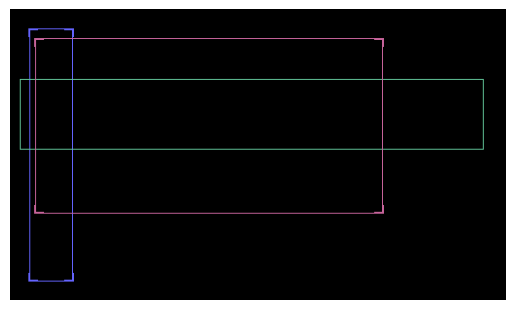

In [ ]:
image = PIL.Image.fromarray(np.zeros((300, 512, 3), dtype=np.uint8))
image = overlay(image, BBox.from_xyxy(20, 20, 64, 280), (100, 100, 255))
image = overlay(image, BBox.from_xywh(10, 72, 478, 72), (100, 200, 155), gap=False)
image = overlay(image, BBox.from_relative_xcycwh(.4, .4, .7, .6, 512, 300), (199, 100, 155))
pv.show_image(image)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()